<a href="https://colab.research.google.com/github/ElijahMorales04/reu-tribolium-modeling/blob/main/Discrete_Dispersal_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

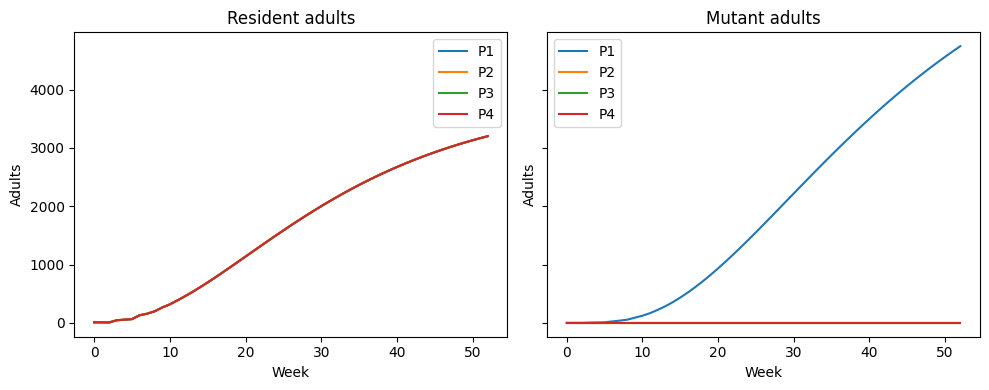

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
b      = 20          # eggs per adult (baseline)
c_ea   = 0.0003      # eggs eaten by adults
c_el   = 0.0179      # eggs eaten by larvae
c_pa   = 0.0         # pupae eaten by adults
mu_l   = 0.6053      # larval mortality
mu_a   = 0.0842      # adult  mortality
gamma_r, gamma_m = 0.3, 0.0   # dispersal shares (residents, mutants)
epsilon = 0.1        # dispersal mortality
T, P   = 52, 4       # weeks, patches

# state arrays (patch × time)
Lr = np.zeros((P, T + 1))   # resident larvae
Pr = np.zeros((P, T + 1))   # resident pupae
Ar = np.zeros((P, T + 1))   # resident adults
Lm = np.zeros((P, T + 1))   # mutant   larvae
Pm = np.zeros((P, T + 1))   # mutant   pupae
Am = np.zeros((P, T + 1))   # mutant   adults

Ar[:, 0] = 10   # 10 resident adults per patch
Am[0, 0] = 1    # single mutant adult in patch 0

survive_eggs = lambda E, A, L: E / (1 + c_ea * A + c_el * L)

def disperse(A, gamma):
    stay   = A * (1 - gamma)
    move   = A * gamma * (1 - epsilon)
    influx = move.mean(axis=0)        # equal redistribution
    return stay + influx

for t in range(T):
    # residents
    Er        = b * Ar[:, t]
    L_new_r   = survive_eggs(Er, Ar[:, t], Lr[:, t])
    L_surv_r  = Lr[:, t] * (1 - mu_l)
    P_surv_r  = Pr[:, t] * (1 - c_pa * Ar[:, t])
    Pr[:, t+1] = 0.5 * L_surv_r
    Lr[:, t+1] = 0.5 * L_surv_r + L_new_r
    A_next_r   = (Ar[:, t] * (1 - mu_a)) + P_surv_r
    Ar[:, t+1] = disperse(A_next_r, gamma_r)

    # mutants
    Em        = b * Am[:, t]
    L_new_m   = survive_eggs(Em, Am[:, t], Lm[:, t])
    L_surv_m  = Lm[:, t] * (1 - mu_l)
    P_surv_m  = Pm[:, t] * (1 - c_pa * Am[:, t])
    Pm[:, t+1] = 0.5 * L_surv_m
    Lm[:, t+1] = 0.5 * L_surv_m + L_new_m
    A_next_m   = (Am[:, t] * (1 - mu_a)) + P_surv_m
    Am[:, t+1] = disperse(A_next_m, gamma_m)

# plot adults
weeks = np.arange(T + 1)
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
for p in range(P):
    axes[0].plot(weeks, Ar[p], color=colors[p], label=f"P{p+1}")
    axes[1].plot(weeks, Am[p], color=colors[p], label=f"P{p+1}")

axes[0].set_title("Resident adults")
axes[1].set_title("Mutant adults")
for ax in axes:
    ax.set_xlabel("Week")
    ax.set_ylabel("Adults")
    ax.legend()

plt.tight_layout()
plt.show()